$c(x,0) = \sum_{n=1}^N C_n sin(n\pi x) = \phi(x) = 1$ when $0<x<1$

In [6]:
import sympy as sp
sp.init_session(quiet=True)
sp.init_printing()

var('X,T',cls=Function)
var('alpha gamma c', positive=True)
var('C1 C2')

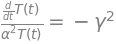

In [2]:
timeODE = sp.Eq(T(t).diff(t,1)/(alpha**2*T(t)),-gamma**2)
timeODE

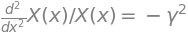

In [3]:
spaceODE = sp.Eq(X(x).diff(x,2)/X(x),-gamma**2)
spaceODE

In [4]:
sp.dsolve(timeODE,T(t))

In [5]:
list_of_hints = sp.classify_ode(timeODE)
list_of_solutions = [sp.dsolve(timeODE,T(t), hint=hint) for hint in list_of_hints]
list_of_solutions

timePiece = sp.dsolve(timeODE,T(t), hint='1st_linear')
timePiece

spacePiece = sp.dsolve(spaceODE,X(x))
spacePiece

In [8]:
generalSolution = (timePiece.rhs).subs(C1,1)*spacePiece.rhs
generalSolution

In [10]:
genSub = generalSolution.subs({t:0, C2:0, gamma:n*sp.pi})
genSub

In [14]:
sp.fourier_series(genSub,(0,1))

ValueError:  specify dummy variables for C1*sin(pi*n*x). If the function contains more than one free symbol, a dummy variable should be supplied explicitly e.g. FourierSeries(m*n**2, (n, -pi, pi))